In [13]:
import pandas as pd
import shogun as sg
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
def load(path, is_labels=False):
    if path.exists() and path.is_file():
        df = pd.read_csv(path)
        if is_labels:
            df = pd.Series(df['incidence'])
        return df.values

In [15]:
country = 'italy'

In [16]:
path = Path.cwd()
# country = 'italy'
test_data_path = path.parent / 'data' / 'test' / country
processed_data_path = path.parent / 'data' / 'processed'
x_train_file_path = test_data_path / 'X_train.csv'
y_train_file_path = test_data_path / 'y_train.csv'
x_test_file_path = test_data_path / 'X_test.csv'
y_test_file_path = test_data_path / 'y_test.csv'

# x_train_file_path = processed_data_path / (country + '_features.csv')
# y_train_file_path = processed_data_path / (country + '_labels.csv')
            

X_train = pd.read_csv(x_train_file_path).values
y_train = pd.read_csv(y_train_file_path).values
X_test = pd.read_csv(x_test_file_path).values
y_test = pd.read_csv(y_test_file_path).values

In [17]:
features_train = sg.create_features(load(x_train_file_path).T)
features_test = sg.create_features(load(x_test_file_path).T)
labels_train = sg.create_labels(load(y_train_file_path, is_labels=True))
labels_test = sg.create_labels(load(y_test_file_path, is_labels=True))

# features_train = sg.create_features(load(x_train_file_path).T)
# labels_train = sg.create_labels(load(y_train_file_path, is_labels=True))

In [18]:
glm = sg.create_machine("GLM", labels=labels_train, alpha=0.01,
                     learning_rate=0.002, max_iterations=1, tolerance=0.000001, eta=0.2)
glm.put("lambda", 0.01)
glm.train(features_train)
# labels_predict = glm.apply(features_test)
labels_train_predict = glm.apply(features_train)
# eval = sg.create_evaluation("MeanSquaredError")
# mse = eval.evaluate(labels_predict, labels_test)
# print('Mean Squared Error for Poisson Regression is '+str(mse))

In [19]:
y_train_predicted = labels_train_predict.get("labels").reshape(labels_train_predict.get("labels").shape[0])
# y_test_predicted = labels_predict.get("labels").reshape(labels_predict.get("labels").shape[0])
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

In [20]:
y_train_predicted

array([3.72661058, 3.89398286, 4.06257932, 4.14328242, 4.65686139,
       4.71416238, 4.77734749, 0.75087864, 0.7779029 , 0.85333593,
       0.97440936, 1.05216883, 1.1209349 , 1.22054303, 1.26535781,
       1.29032303, 1.44242048, 1.48966057, 1.59277191, 1.68177008,
       1.75399892, 4.13205089, 4.2706571 , 4.36934367, 4.44377436,
       4.54961579, 4.67315087, 4.74105388, 4.82075248, 4.88585634,
       4.87413405, 0.66488677, 0.89965166, 1.00621615, 1.17995699,
       1.20247032, 1.31591586, 1.39656838, 1.46198308, 1.54110899,
       1.59713343, 1.74499489, 1.89258761, 1.89801354, 4.38105062,
       4.59652754, 4.99844404, 4.7120615 , 4.72999835, 4.76082537,
       4.82855481, 4.91077639, 4.93216631, 0.78790778, 0.94045564,
       0.90564687, 1.13933994, 1.25096334, 1.25873785, 1.40279433,
       1.3524088 , 1.4836425 , 1.63078852, 1.6195875 , 1.6834711 ,
       1.89661168, 4.26164888, 4.43598453, 4.6567323 , 4.73020023,
       4.79396213, 5.04272231, 4.9444499 , 4.98324226, 1.21113

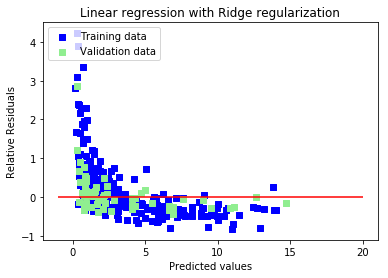

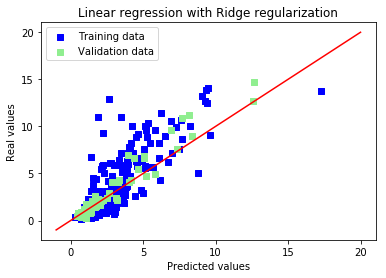

In [38]:
# Plot residuals
plt.scatter(y_train, (y_train_predicted - y_train)/y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, (y_test_predicted - y_test)/y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Relative Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = -1, xmax = 20, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_predicted, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_predicted, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([-1, 20], [-1, 20], c = "red")
plt.show()